#Lab:02-Homography:

In [44]:
from numpy import *
import sys
import math
import cv2
import matplotlib.pyplot as plt



*   Given are two aerial images (IMG1.png, IMG2.png) of an airport parking bay








In [45]:
#Reading the both images:
img1 = cv2.imread("IMG1.png",0)
img2 = cv2.imread("IMG2.png",0)

In [46]:
width, height= img1.shape #finding the no' of pixels in x axis and y axis of image1
print(width, height)
width2, height2=img2.shape #finding the no' of pixels in x axis and y axis of image2
print(width2,height2)


296 512
517 598


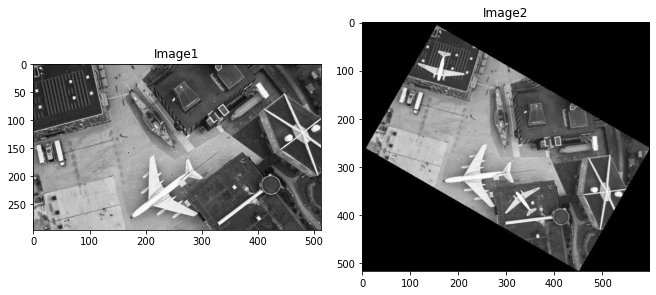

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img1,'gray')             #displaying gray scale image
ax1.title.set_text("Image1")  #setting title to the figure
ax2.imshow(img2,'gray')       
ax2.title.set_text("Image2")

*   These images were captured using two cameras placed at different locations and at different instants of time but overlooking the same area.
It is known that the images are related by an in-plane 

*   It is known that the images are related by an in-plane rotation and translation.

The following point correspondences are given:
Correspondence IMG1 (x, y) IMG2 (x, y)

1. (29, 124) (93, 248)

2. (157, 372) (328, 399)

Determine the changes in IMG2 with respect to IMG1.


##Create A matrix by using point correspodances

In [48]:
A= zeros((4, 5))
(x1,y1)=(29,124)
(x11,y11)=(93,248)
(x2,y2)=(157,372)
(x21,y21)=(328,399)
A[0]=[x1,y1,1,0,-x11]
A[1]=[y1,-x1,0,1,-y11]
A[2]=[x2,y2,1,0,-x21]
A[3]=[y2,-x2,0,1,-y21]

In [49]:
A

array([[  29.,  124.,    1.,    0.,  -93.],
       [ 124.,  -29.,    0.,    1., -248.],
       [ 157.,  372.,    1.,    0., -328.],
       [ 372., -157.,    0.,    1., -399.]])

##Calculating H:

In [50]:
# NumPy SVD gives singular values in decreasing order
u, s, v_T = linalg.svd(A)
# take the last row of v_transpose
h11, h12, h13, h23, h33 = v_T[-1]
# construct the appropriate 3x3 matrix
H = array([[h11, h12, h13], [-h12, h11, h23], [0, 0, h33]]).reshape(3,3)
H_inv = linalg.inv(H)

In [51]:
u

array([[-0.15488127, -0.26450479, -0.09194026, -0.94741543],
       [-0.37223008,  0.14321735, -0.91049632,  0.10922459],
       [-0.57543961, -0.74995875,  0.15192008,  0.28870643],
       [-0.71156574,  0.58914164,  0.37344843, -0.08439542]])

In [52]:
v_T

array([[-5.66680129e-01, -1.54708850e-01, -1.02012295e-03,
        -1.51386194e-03,  8.09280835e-01],
       [ 2.63369043e-01, -9.64690631e-01, -2.39610015e-03,
         1.72978664e-03,  7.63140336e-17],
       [ 7.80690891e-01,  2.13117103e-01,  9.91934221e-04,
        -8.88158970e-03,  5.87386557e-01],
       [ 9.32691119e-04,  2.80420132e-03, -9.99285986e-01,
         3.76667654e-02, -1.09108157e-16],
       [ 5.58939886e-03,  3.22411836e-03,  3.76796071e-02,
         9.99248242e-01,  6.44691237e-03]])

In [53]:
H

array([[ 0.0055894 ,  0.00322412,  0.03767961],
       [-0.00322412,  0.0055894 ,  0.99924824],
       [ 0.        ,  0.        ,  0.00644691]])

In [54]:
img_t=zeros((width2, height2))   #creating zeros 2d array for target image which is of size of source image 
#adding zeros at four boundaries to the source the image and storing in other 2d array
img_padded = zeros((width2+2, height2+2))
img_padded[1:-1, 1:-1] = img2    #Assigning source intensity values from row,column 2 to row,column 257

In [55]:
for xt in range(width2):        #traversing along rows of target image
  for yt in range(height2):     #traversing along columns of target image

    # convert to homogenous coordinates
    vec = array([xt, yt, 1])
    x_prime=dot(H,vec)
    if x_prime[-1]!=0:
      # return in non homogenous coordinates
      (xs,ys)=( x_prime[0]/x_prime[-1], x_prime[1]/x_prime[-1])
    else:
      (xs,ys)=(0,0)
    # Assign the value using bilinear interpolation

    x=xs+1                     #adding one because index number increased by adding a row at beginning of padded img
    y=ys+1                     #adding one because index number increased by adding a column at beginning of padded img
    xs1=math.floor(x)          #to get one of the nearest integer sourse x co-ord'
    ys1=math.floor(y)          #to get one of the nearest integer sourse y co-ord'
    a=x-xs1                    #distance to the landed x point from xs
    b=y-ys1                    #distance to the landed y point from ys

    #bilinear interpolation
    #assingning intensity to the target image by considering four nearest neighbors
    if xs1>=0 and xs1<=width2 and ys1>=0 and ys1<=height2:
      img_t[xt,yt]=(1-a)*(1-b)*img_padded[xs1,ys1]+(1-a)*b*img_padded[xs1,ys1+1]+a*(1-b)*img_padded[xs1+1,ys1]+a*b*img_padded[xs1+1,ys1+1]
    else:
      img_t[xt,yt]=0           #assign 0 to the values where xs and ys dont exist.


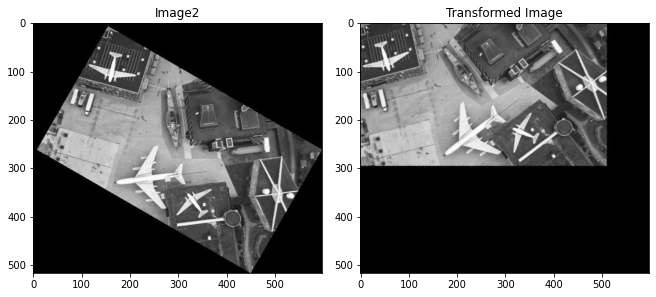

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img2,'gray') 
ax1.title.set_text("Image2") 
ax2.imshow(img_t,'gray')       
ax2.title.set_text("Transformed Image")

In [57]:
img_t2=img_t[:width,:height]

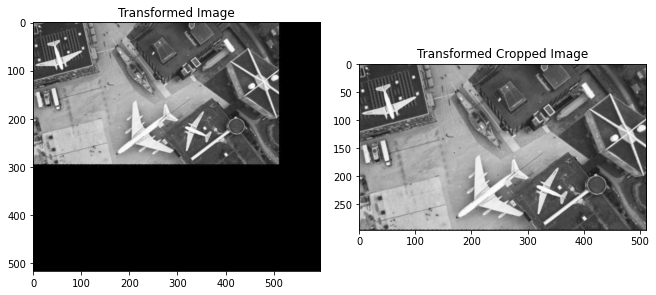

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img_t,'gray')            
ax1.title.set_text("Transformed Image")  
ax2.imshow(img_t2,'gray')       
ax2.title.set_text("Transformed Cropped Image")

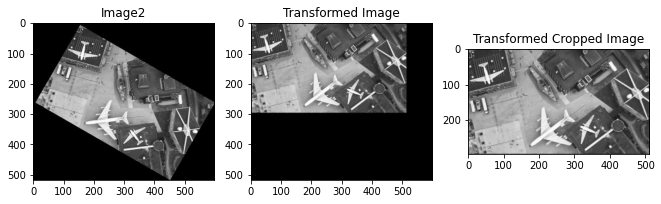

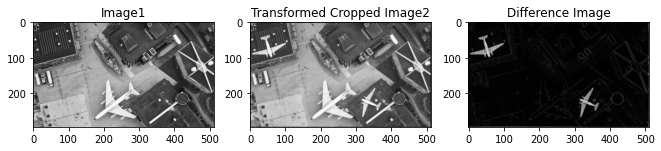

In [59]:

diff = abs(img1-img_t2) 

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(9,12), constrained_layout=True)
ax1.imshow(img2,'gray')      
ax1.title.set_text("Image2")
ax2.imshow(img_t,'gray')       
ax2.title.set_text("Transformed Image") 
ax3.imshow(img_t2,'gray')       
ax3.title.set_text("Transformed Cropped Image") 
fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(9,12), constrained_layout=True)
ax4.imshow(img1,'gray')      
ax4.title.set_text("Image1")
ax5.imshow(img_t2,'gray')       
ax5.title.set_text("Transformed Cropped Image2") 
ax6.imshow(diff,'gray')       
ax6.title.set_text("Difference Image")

**Conclusion**: 

We can clearly detect the two aeroplanes which are missing in Image2 in the difference image

**References:**

[1]	https://towardsdatascience.com/simple-svd-algorithms-13291ad2eef2 

[2]	https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
